# Algoritmos Genéticos

Este notebook faz parte do [Currículo de IA para Iniciantes](http://github.com/microsoft/ai-for-beginners).


In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np
import math
import time

## Um Pouco de Teoria

**Algoritmos Genéticos** (GA) são baseados em uma **abordagem evolutiva** para IA, na qual métodos de evolução de populações são usados para obter uma solução ótima para um determinado problema. Eles foram propostos em 1975 por [John Henry Holland](https://en.wikipedia.org/wiki/John_Henry_Holland).

Os Algoritmos Genéticos são baseados nas seguintes ideias:
* Soluções válidas para o problema podem ser representadas como **genes**
* O **Crossover** permite combinar duas soluções para obter uma nova solução válida
* A **Seleção** é usada para escolher soluções mais otimizadas utilizando alguma **função de aptidão**
* **Mutações** são introduzidas para desestabilizar a otimização e nos tirar de mínimos locais

Se você quiser implementar um Algoritmo Genético, precisará do seguinte:

* Encontrar um método para codificar as soluções do problema usando **genes** $g\in\Gamma$
* No conjunto de genes $\Gamma$, é necessário definir uma **função de aptidão** $\mathrm{fit}: \Gamma\to\mathbb{R}$. Valores menores da função corresponderiam a soluções melhores.
* Definir um mecanismo de **crossover** para combinar dois genes e obter uma nova solução válida $\mathrm{crossover}: \Gamma^2\to\Gamma$.
* Definir um mecanismo de **mutação** $\mathrm{mutate}: \Gamma\to\Gamma$.
Em muitos casos, os algoritmos de crossover e mutação são bastante simples para manipular genes como sequências numéricas ou vetores de bits.

A implementação específica de um algoritmo genético pode variar de caso para caso, mas a estrutura geral é a seguinte:

1. Selecionar a população inicial $G\subset\Gamma$
2. Selecionar aleatoriamente uma das operações que será realizada nesta etapa: crossover ou mutação
3. **Crossover**:
   * Selecionar aleatoriamente dois genes $g_1, g_2 \in G$
   * Calcular o crossover $g=\mathrm{crossover}(g_1,g_2)$
   * Se $\mathrm{fit}(g)<\mathrm{fit}(g_1)$ ou $\mathrm{fit}(g)<\mathrm{fit}(g_2)$ - substituir o gene correspondente na população por $g$.
4. **Mutação** - selecionar um gene aleatório $g\in G$ e substituí-lo por $\mathrm{mutate}(g)$
5. Repetir a partir do passo 2, até obtermos um valor suficientemente pequeno de $\mathrm{fit}$, ou até que o limite no número de etapas seja alcançado.

Tarefas tipicamente resolvidas por GA:
1. Otimização de cronogramas
1. Empacotamento ótimo
1. Corte ótimo
1. Aceleração de busca exaustiva


## Problema 1: Divisão Justa do Tesouro

**Tarefa**:  
Duas pessoas encontraram um tesouro que contém diamantes de diferentes tamanhos (e, consequentemente, diferentes valores). Elas precisam dividir o tesouro em duas partes de forma que a diferença de valor seja 0 (ou mínima).

**Definição formal**:  
Temos um conjunto de números $S$. Precisamos dividi-lo em dois subconjuntos $S_1$ e $S_2$, de forma que $$\left|\sum_{i\in S_1}i - \sum_{j\in S_2}j\right|\to\min$$ e $S_1\cup S_2=S$, $S_1\cap S_2=\emptyset$.

Primeiramente, vamos definir o conjunto $S$:


In [3]:
N = 200
S = np.array([random.randint(1,10000) for _ in range(N)])
print(S)

[8344 2197 9335 3131 5863 9429 3818 9791   15 5455 1396 9538 4872 6549
 8587 5986 6021 9764 8102 5083 5739 7684 8498 3007 6599  820 7490 2372
 9370 5235 3525 3154  859 1906 8159 3950 2173 2988 2050  349 8713 2284
 4177 6033 1651 9176 5049 8201  171 5081 1216 3756 4711 2757 7738 1272
 5650 6584 5395 9004 7797  969 8104 1283 1392 4001 5768  445  274  256
 8239 8015 4381 9021 1189 8879 1411 3539 6526 8011  136 7230 2332  451
 5702 2989 4320 2446 9578 8486 4027 2410 9588 8981 2177 1493 3232 9151
 4835 5594 6859 8394  369 3200  126 4259 2283 7755 2014 2458 8327 8082
 7413 7622 1206 5533 8751 3495 5868 8472 6850 3958 3149 4672 4810 6274
 4700 6134 4627 4616 6656 9949  884 2256 7419 1926 7973 5319 5967 9158
 3823 7697 9466 5675 5412 9784 5426 8209 3421 1136 6047 4429 8001 4417
 1381  722 7350 6018 6235 7860 5853 7660 5937 6242    1 9552 3971 8302
 2633 9227 7283  154 8599 4269 9392 8539 1630  368 2409 9351 3838 9814
 6186 5743 5083 1325 1610  779 3643 3262 5768 8725  961 4611 6310 4788
 1648 

Vamos codificar cada solução possível do problema por um vetor binário $B\in\{0,1\}^N$, onde o número na posição $i$ indica a qual dos conjuntos ($S_1$ ou $S_2$) o $i$-ésimo número no conjunto original $S$ pertence. A função `generate` irá gerar esses vetores binários aleatórios.


In [5]:
def generate(S):
    return np.array([random.randint(0,1) for _ in S])

b = generate(S)
print(b)

[1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1
 0 1 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0
 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1
 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1
 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0
 0 0 0 1 0 1 1 0 1 1 0 1 0 0 0]


Vamos agora definir a função `fit` que calcula o "custo" da solução. Será a diferença entre a soma de dois conjuntos, $S_1$ e $S_2$:


In [6]:
def fit(B,S=S):
    c1 = (B*S).sum()
    c2 = ((1-B)*S).sum()
    return abs(c1-c2)

fit(b)

133784

Agora precisamos definir funções para mutação e crossover:  
* Para mutação, selecionaremos um bit aleatório e o negaremos (alterar de 0 para 1 e vice-versa).  
* Para crossover, pegaremos alguns bits de um vetor e alguns bits de outro. Usaremos a mesma função `generate` para selecionar aleatoriamente quais bits serão retirados de cada uma das máscaras de entrada.  


In [7]:
def mutate(b):
    x = b.copy()
    i = random.randint(0,len(b)-1)
    x[i] = 1-x[i]
    return x

def xover(b1,b2):
    x = generate(b1)
    return b1*x+b2*(1-x)

Vamos criar a população inicial das soluções $P$ de tamanho `pop_size`:


In [8]:
pop_size = 30
P = [generate(S) for _ in range(pop_size)]

Agora, a função principal para realizar a evolução. `n` é o número de etapas de evolução a serem realizadas. Em cada etapa:
* Com uma probabilidade de 30%, realizamos uma mutação e substituímos o elemento com a pior função `fit` pelo elemento mutado
* Com uma probabilidade de 70%, realizamos o crossover

A função retorna a melhor solução (gene correspondente à melhor solução) e o histórico da função `fit` mínima na população em cada iteração.


In [9]:
def evolve(P,S=S,n=2000):
    res = []
    for _ in range(n):
        f = min([fit(b) for b in P])
        res.append(f)
        if f==0:
            break
        if random.randint(1,10)<3:
            i = random.randint(0,len(P)-1)
            b = mutate(P[i])
            i = np.argmax([fit(z) for z in P])
            P[i] = b
        else:
            i = random.randint(0,len(P)-1)
            j = random.randint(0,len(P)-1)
            b = xover(P[i],P[j])
            if fit(b)<fit(P[i]):
                P[i]=b
            elif fit(b)<fit(P[j]):
                P[j]=b
            else:
                pass
    i = np.argmin([fit(b) for b in P])
    return (P[i],res)

(s,hist) = evolve(P)
print(s,fit(s))

[0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0
 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0
 0 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1
 0 1 1 0 0 0 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0
 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1
 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1] 4


Você pode ver que conseguimos minimizar bastante a função `fit`! Aqui está o gráfico que mostra como a função `fit` para toda a população se comporta durante o processo.


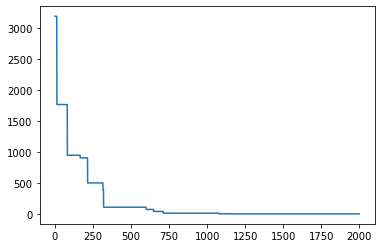

In [10]:
plt.plot(hist)
plt.show()

## Problema 2: Problema das N Rainhas

**Tarefa**:  
Você precisa posicionar $N$ rainhas em um tabuleiro de xadrez de tamanho $N\times N$ de forma que elas não se ataquem.

Primeiramente, vamos resolver o problema sem usar algoritmos genéticos, utilizando uma busca completa. Podemos representar o estado do tabuleiro por uma lista $L$, onde o número na posição $i$ da lista representa a posição horizontal da rainha na linha $i$. É bastante óbvio que cada solução terá apenas uma rainha por linha, e cada linha terá uma rainha.

Nosso objetivo será encontrar a primeira solução para o problema, após o que interromperemos a busca. Você pode facilmente estender essa função para gerar todas as posições possíveis para as rainhas.


In [11]:
N = 8

def checkbeats(i_new,j_new,l):
    for i,j in enumerate(l,start=1):
        if j==j_new:
            return False
        else:
            if abs(j-j_new) == i_new-i:
                return False
    return True

def nqueens(l,N=8,disp=True):
    if len(l)==N:
        if disp: print(l)
        return True
    else:
        for j in range(1,N+1):
            if checkbeats(len(l)+1,j,l):
                l.append(j)
                if nqueens(l,N,disp): return True
                else: l.pop()
        return False
            
nqueens([],8)


[1, 5, 8, 6, 3, 7, 2, 4]


True

Agora vamos medir quanto tempo leva para obter uma solução para o problema das 20 rainhas:


In [12]:
%timeit nqueens([],20,False)

10.6 s ± 2.17 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


Agora vamos resolver o mesmo problema usando um algoritmo genético. Esta solução foi inspirada por [este post no blog](https://kushalvyas.github.io/gen_8Q.html).

Representaremos cada solução pela mesma lista de comprimento $N$, e como função de `fit` utilizaremos o número de rainhas que se atacam mutuamente:


In [13]:
def fit(L):
    x=0
    for i1,j1 in enumerate(L,1):
        for i2,j2 in enumerate(L,1):
            if i2>i1:
                if j2==j1 or (abs(j2-j1)==i2-i1): x+=1
    return x

Como calcular a função de aptidão consome tempo, vamos armazenar cada solução na população junto com o valor da função de aptidão. Vamos gerar a população inicial:


In [14]:
def generate_one(N):
    x = np.arange(1,N+1)
    np.random.shuffle(x)
    return (x,fit(x))

def generate(N,NP):
    return [generate_one(N) for _ in range(NP)]

generate(8,5)

[(array([2, 3, 8, 7, 5, 4, 1, 6]), 4),
 (array([3, 4, 5, 1, 2, 8, 6, 7]), 8),
 (array([1, 3, 7, 4, 5, 8, 6, 2]), 6),
 (array([1, 5, 4, 6, 8, 3, 7, 2]), 4),
 (array([3, 5, 7, 1, 8, 6, 4, 2]), 3)]

In [15]:
def mutate(G):
    x=random.randint(0,len(G)-1)
    G[x]=random.randint(1,len(G))
    return G
    
def xover(G1,G2):
    x=random.randint(0,len(G1))
    return np.concatenate((G1[:x],G2[x:]))

xover([1,2,3,4],[5,6,7,8])

array([1, 2, 7, 8])

In [17]:
def choose_rand(P):
    N=len(P[0][0])
    mf = N*(N-1)//2 # max fitness fn
    z = [mf-x[1] for x in P]
    tf = sum(z) # total fitness
    w = [x/tf for x in z]
    p = np.random.choice(len(P),2,False,p=w)
    return p[0],p[1]

def choose(P):
    def ch(w):
        p=[]
        while p==[]:
            r = random.random()
            p = [i for i,x in enumerate(P) if x[1]>=r]
        return random.choice(p)
    N=len(P[0][0])
    mf = N*(N-1)//2 # max fitness fn
    z = [mf-x[1] for x in P]
    tf = sum(z) # total fitness
    w = [x/tf for x in z]
    p1=p2=0
    while p1==p2:
        p1 = ch(w)
        p2 = ch(w)
    return p1,p2

Agora vamos definir o principal loop evolutivo. Faremos a lógica um pouco diferente do exemplo anterior, para mostrar que é possível ser criativo. Vamos repetir o loop até obtermos a solução perfeita (função de aptidão = 0), e a cada etapa pegaremos a geração atual e produziremos uma nova geração do mesmo tamanho. Isso é feito usando a função `nxgeneration`, seguindo os passos abaixo:

1. Descartar as soluções menos aptas - existe a função `discard_unfit` que realiza essa tarefa
1. Adicionar algumas soluções aleatórias à geração
1. Preencher a nova geração de tamanho `gen_size` seguindo os passos abaixo para cada novo gene:
    - selecionar dois genes aleatórios, com probabilidade proporcional à função de aptidão
    - calcular um crossover
    - aplicar uma mutação com a probabilidade `mutation_prob`


In [20]:
mutation_prob = 0.1

def discard_unfit(P):
    P.sort(key=lambda x:x[1])
    return P[:len(P)//3]

def nxgeneration(P):
    gen_size=len(P)
    P = discard_unfit(P)
    P.extend(generate(len(P[0][0]),3))
    new_gen = []
    for _ in range(gen_size):
        p1,p2 = choose_rand(P)
        n = xover(P[p1][0],P[p2][0])
        if random.random()<mutation_prob:
            n=mutate(n)
        nf = fit(n)
        new_gen.append((n,nf))
        '''
        if (nf<=P[p1][1]) or (nf<=P[p2][1]):
            new_gen.append((n,nf))
        elif (P[p1][1]<P[p2][1]):
            new_gen.append(P[p1])
        else:
            new_gen.append(P[p2])
        '''
    return new_gen
    
def genetic(N,pop_size=100):
    P = generate(N,pop_size)
    mf = min([x[1] for x in P])
    n=0
    while mf>0:
        #print("Generation {0}, fit={1}".format(n,mf))
        n+=1
        mf = min([x[1] for x in P])
        P = nxgeneration(P)
    mi = np.argmin([x[1] for x in P])
    return P[mi]

genetic(8)

(array([4, 7, 5, 3, 1, 6, 8, 2]), 0)

In [19]:
%timeit genetic(10)

The slowest run took 18.71 times longer than the fastest. This could mean that an intermediate result is being cached.
26.4 s ± 28.7 s per loop (mean ± std. dev. of 7 runs, 1 loop each)



---

**Aviso Legal**:  
Este documento foi traduzido utilizando o serviço de tradução por IA [Co-op Translator](https://github.com/Azure/co-op-translator). Embora nos esforcemos para garantir a precisão, esteja ciente de que traduções automáticas podem conter erros ou imprecisões. O documento original em seu idioma nativo deve ser considerado a fonte oficial. Para informações críticas, recomenda-se a tradução profissional realizada por humanos. Não nos responsabilizamos por quaisquer mal-entendidos ou interpretações equivocadas decorrentes do uso desta tradução.
